In [1]:
import numpy as np
import keras
import pandas as pd

In [2]:
# # import data :
# data = pd.read_csv('Solarenergie_Hochrechnung_2024.csv')

# # data.head()

In [3]:
# # Data Preprocessing :

# # Rename columns + split data to it's columns:
# data[['Date', 'From', 'To', 'Energy(MW)']] = data['Datum;von;bis;MW'].str.split(';', expand=True)

# data.drop(['Datum;von;bis;MW','From','To'], axis=1, inplace=True)

# # Convert 'Energiy(MW)' values from 'String' to a 'int' :
# data['Energy(MW)'] = data['Energy(MW)'].astype(int)

# data[['Day','Month','Year']] = pd.to_datetime(data['Date'], format='%d.%m.%Y').dt.strftime('%d-%m-%Y').str.split('-', expand=True)
# data.drop(['Date'], axis=1, inplace=True)

# # regroup all line from 1 day to 1 line → using pandas 'GroupBy' :
# data = data.groupby(['Year','Month','Day'])['Energy(MW)'].agg('sum').reset_index()

# # Split 'Date' to 'Day', 'Month', 'Year' :

# data = data[['Energy(MW)','Day','Month','Year']]



In [4]:
def Preprocessing(data):
    """
    data : DataFrame object\n
    and
    return : DataFrame object
    """
    
    # Rename columns + split data to its columns:
    data[['Date', 'From', 'To', 'Energy(MW)']] = data['Datum;von;bis;MW'].str.split(';', expand=True)

    data.drop(['Datum;von;bis;MW','From','To'], axis=1, inplace=True)

    # Convert 'Energy(MW)' values from 'String' to an 'int':
    data['Energy(MW)'] = data['Energy(MW)'].astype(int)

    # Regroup all lines from 1 day to 1 line → using pandas 'GroupBy':
    # data = data.groupby(['Date'])['Energy(MW)'].agg('sum').reset_index()

    # Split 'Date' into 'Day', 'Month', 'Year':
    data[['Day','Month','Year']] = pd.to_datetime(data['Date'], format='%d.%m.%Y').dt.strftime('%d-%m-%Y').str.split('-', expand=True)
    data.drop(['Date'], axis=1, inplace=True)

    data = data.groupby(['Year','Month','Day'])['Energy(MW)'].agg('sum').reset_index()


    data = data[['Day','Month','Year','Energy(MW)']]
    
    return data

In [5]:
# # Loeading all data :
# data_1 = pd.read_csv('Solarenergie_Hochrechnung_2024.csv')
# data_2 = pd.read_csv('Solarenergie_Hochrechnung_2023.csv')
# data_3 = pd.read_csv('Solarenergie_Hochrechnung_2022.csv')
# data_4 = pd.read_csv('Solarenergie_Hochrechnung_2021.csv')
# data_5 = pd.read_csv('Solarenergie_Hochrechnung_2020.csv')
# data_6 = pd.read_csv('Solarenergie_Hochrechnung_2019.csv')
# data_7 = pd.read_csv('Solarenergie_Hochrechnung_2018.csv')
# data_8 = pd.read_csv('Solarenergie_Hochrechnung_2017.csv')
# data_9 = pd.read_csv('Solarenergie_Hochrechnung_2016.csv')
# data_10 = pd.read_csv('Solarenergie_Hochrechnung_2015.csv')
# data_11 = pd.read_csv('Solarenergie_Hochrechnung_2014.csv')
# data_12 = pd.read_csv('Solarenergie_Hochrechnung_2013.csv')
# data_13 = pd.read_csv('Solarenergie_Hochrechnung_2012.csv')
# data_14 = pd.read_csv('Solarenergie_Hochrechnung_2011.csv')
# data_15 = pd.read_csv('Solarenergie_Hochrechnung_2010.csv')

# data_1 = Preprocessing(data_1)
# data_2 = Preprocessing(data_2)
# data_3 = Preprocessing(data_3)
# data_4 = Preprocessing(data_4)
# data_5 = Preprocessing(data_5)
# data_6 = Preprocessing(data_6)
# data_7 = Preprocessing(data_7)
# data_8 = Preprocessing(data_8)
# data_9 = Preprocessing(data_9)
# data_10 = Preprocessing(data_10)
# data_11 = Preprocessing(data_11)
# data_12 = Preprocessing(data_12)
# data_13 = Preprocessing(data_13)
# data_14 = Preprocessing(data_14)
# data_15 = Preprocessing(data_15)

# # Concatenate all data :
# data = pd.concat([data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15], axis=0).iloc[::-1, ::-1]

# # Save the final data :
# data.to_csv('Solarenergie_Hochrechnung.csv', index=False)

In [6]:
# import data :
data = pd.read_csv('Solarenergie_Hochrechnung.csv')

<Axes: title={'center': 'Energy(MW) per Year'}, xlabel='Year'>

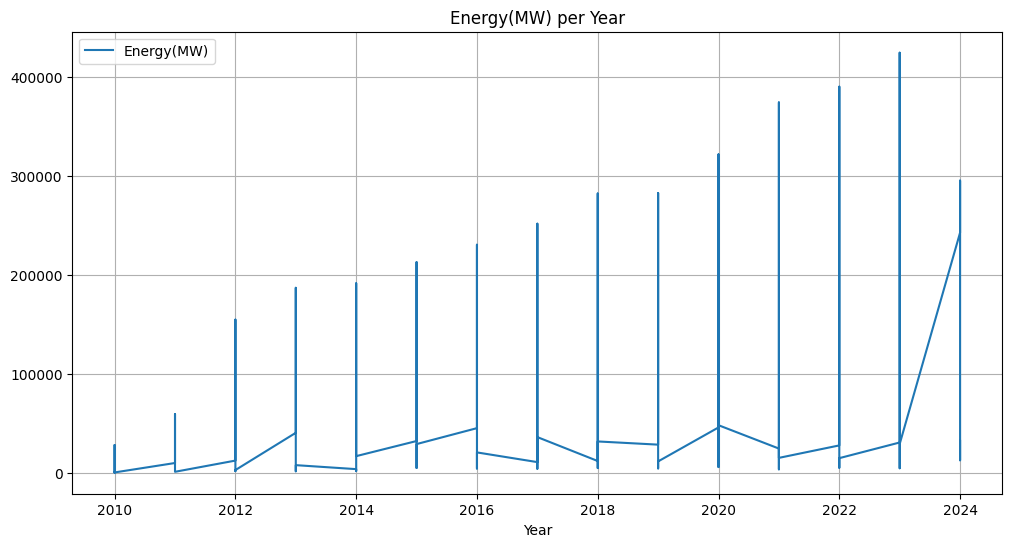

In [7]:
# diplay the data :
data.plot(figsize=  (12,6), x='Year', y='Energy(MW)', title='Energy(MW) per Year', grid=True)

In [8]:
# create sequences of data :
def create_sequences(data, seq_length):  
    X = []
    y = []
    
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length].values)
        y.append(data.iloc[i+seq_length])
        
    return np.array(X), np.array(y)

In [9]:
#standarization des donnees

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

data = pd.DataFrame(data, columns=['Day','Month','Year','Energy(MW)'])

data = data[['Energy(MW)']]

In [10]:
seq_data_X,seq_data_Y = create_sequences(data, 6)

In [11]:
# Split the data to train and test :

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(seq_data_X, seq_data_Y, test_size=0.2, shuffle=False)

In [12]:
# sample of the data :
print("For the the first 6 data : \n", X_train[0])
print("\n")
print("Predict this : \n", y_train[0])


For the the first 6 data : 
 [[1.        ]
 [0.96666667]
 [0.93333333]
 [0.9       ]
 [0.86666667]
 [0.83333333]]


Predict this : 
 [0.8]


In [13]:
from keras import optimizers as ops

# Xtrain = # define Xtrain variable here

model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=8, input_shape=(6, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=16))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer=ops.Nadam(lr=1e-3), loss='mse')

model.summary()
    

c:\Users\akram\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 8)           │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,937 (7.57 KB)

 Trainable params: 1,937 (7.57 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# configuration before training:
# ps : "compile" method is used to configure the learning process before training the mode
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
model.compile(optimizer=ops.Nadam(learning_rate=1e-3), loss='mse')


In [15]:
# Train the model :
# model.fit(X_train, y_train, epochs=50)
model_train = model.fit(X_train, y_train, validation_split=0.2, epochs=50)#, batch_size=8, verbose=1)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0861 - val_loss: 0.0797
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0774 - val_loss: 0.0653
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0603 - val_loss: 0.0407
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0408 - val_loss: 0.0267
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0306 - val_loss: 0.0134
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0157 - val_loss: 0.0059
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0103 - val_loss: 0.0027
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0069 - val_loss: 0.0014
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0054 - val_loss: 9.7642e-04
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039 - val_loss: 6.7042e-04
Epoch 11/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - val_loss: 5.6382e-04
Epoch 12/50
104/104 ━━━━━━━━━━━━━━━━━━━━

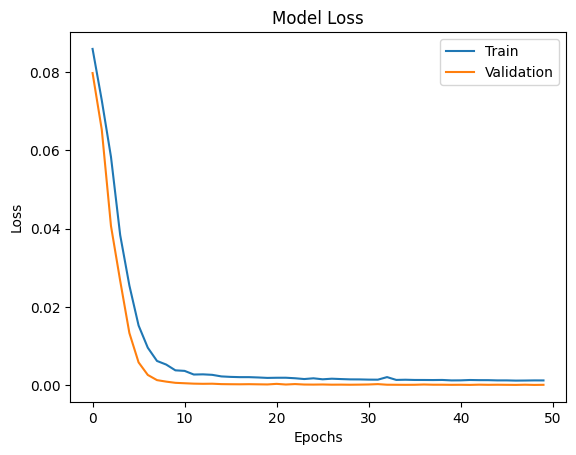

In [16]:
# plot the history of the model :
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [17]:
# Evaluate the model :
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train.flatten()})
train_results.sample(10)

130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Train Predictions,Actuals
3939,0.403522,0.400000
79,0.194273,0.200000
281,0.592698,0.600000
2492,0.967291,0.900000
3346,0.861698,0.866667
901,0.194273,0.200000
4096,0.229318,0.233333
988,0.337054,0.333333
3743,0.803356,0.800000
3718,0.626961,0.633333


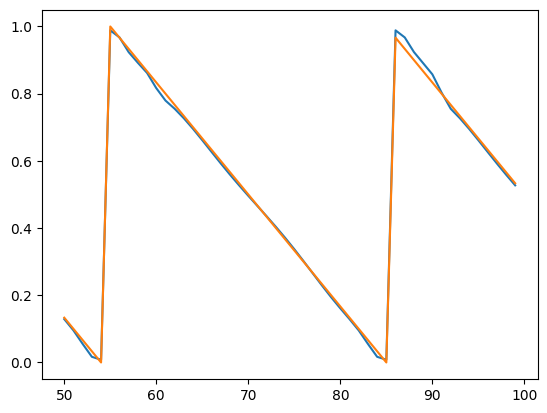

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [19]:
val_predictions = model.predict(X_test).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_test.flatten()})
val_results

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Val Predictions,Actuals
0,0.194273,0.200000
1,0.161043,0.166667
2,0.129011,0.133333
3,0.095375,0.100000
4,0.055238,0.066667
...,...,...
1035,0.129011,0.133333
1036,0.095375,0.100000
1037,0.055238,0.066667
1038,0.016890,0.033333


In [20]:
# accuracy of the model :
accuracy = score = model.evaluate(X_test, y_test, verbose=0)


print("The accuracy of the model is : ", 1-accuracy)



The accuracy of the model is :  0.9997766394371865
